<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 6: *Regression***

###**Tenggat Waktu: 23 November 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 23 November 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan chatgpt tidak akan dinilai dan otomatis mendapat nilai 0



In [3713]:
# Isi dengan data diri Anda
NAMA = "Muhammad Haekal Kalipaksi"
KELAS = "C"
NPM = "2206817490"
USERNAME_KAGGLE = "hkalipaksi7490"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [3714]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Haekal Kalipaksi dari kelas C dengan NPM 2206817490, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Haekal Kalipaksi)


## Intro to Linear Models for Regression

### Linear Regression

Linear regression adalah salah satu metode supervised learning yang bekerja dengan mencari nilai parameter yang paling cocok untuk suatu persamaan linear, yaitu parameter yang menghasilkan error paling minimal. Linear regression menggunakan asumsi bahwa input mempunyai hubungan yang linear dengan target, sehingga model ini akan membuat persamaan garis lurus sebagai fungsi hipotesis.<br>

Contoh persamaan linear

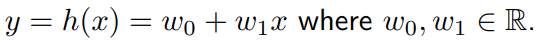

Persamaan di atas adalah fungsi yang memetakan $x$ ke $y$ (dimana $y = h(x)$), dengan:
- $w_0$ adalah _intercept_, titik potong, atau bias
- $w_1$ adalah koefisien
- $x$ adalah nilai independen (input variable)
- $y$ adalah nilai dependen (target variable)

Perhatikan bahwa persamaan tersebut hanya menerima 1 fitur ($x$).

Apabila jumlah fitur pada dataset >1, persamaan bisa digeneralisasikan menjadi sebagai berikut.

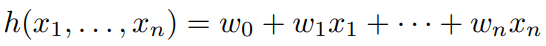

atau

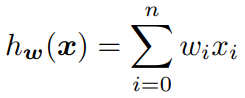

Nilai-nilai parameter seperti $w_0, w_1, w_2, w_n$, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimalkan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression, yang biasa disebut _sum-of-square error function_.

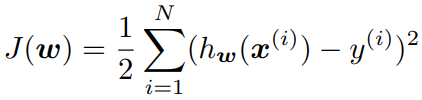

Proses peminimalan nilai loss akan menggunakan algoritma Gradient Descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn menyediakan modul LinearRegression yang siap dipakai untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 10-5x`. Nilai -3 dan 2, secara berurutan dapat dianggap sebagai nilai $w_0$ dan $w_1$.

In [3715]:
# Membuat data sintesis
import numpy as np
import pandas as pd

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
y = 10 - 5 * X

noise = np.array([0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.1, -0.2, 0.2, -0.1])
X_train  = X.reshape(-1, 1)
y_train = y + noise

pd.DataFrame({'feature':X, 'target':y_train})

,feature,target
0,2,0.2
1,3,-5.1
2,2,0.3
3,4,-10.2
4,5,-14.9
5,2,-0.3
6,1,5.1
7,5,-15.2
8,5,-14.8
9,1,4.9


In [3716]:
# Melatih model linear regression menggunakan scikit-learn pada training dataset
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [3717]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear_model.coef_)
print("Intercept persamaan linear: \n", linear_model.intercept_)

Koefisien persamaan linear: 
 [-5.00833333]
Intercept persamaan linear: 
 10.025000000000006


Berdasarkan parameter tersebut, kita dapat membuat visualisasi dari persamaan yang dihasilkan oleh model

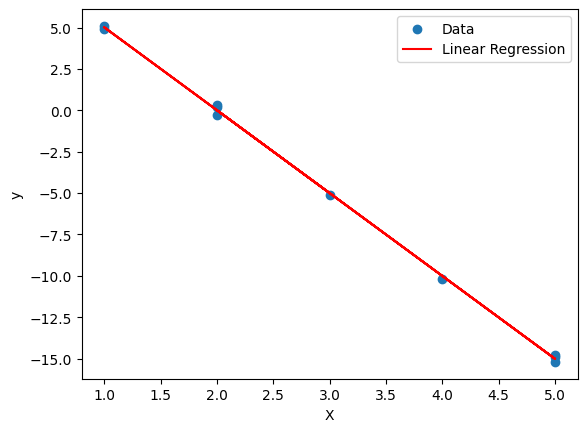

In [3718]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear_model.predict(X_train)

plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

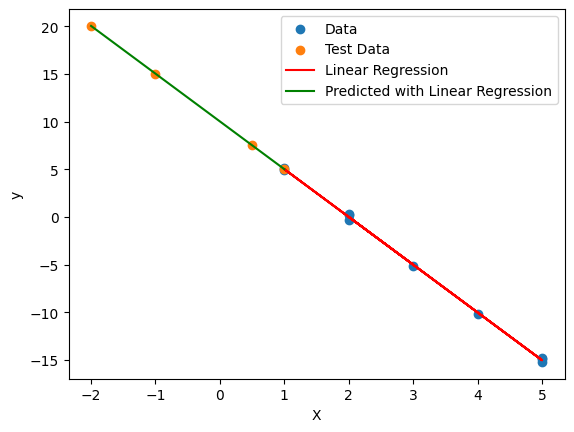

In [3719]:
# Membuat dan memprediksi data test
X_test = np.array([[1],[0.5], [-1], [-2]])
y_test = np.array([5, 7.5, 15, 20])
y_predict = linear_model.predict(X_test)

# Memvisualisasikan hasil prediksi
plt.scatter(X, y_train, label="Data")
plt.scatter(X_test.reshape(-1,1), y_test, label="Test Data")
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.plot(X_test.reshape(-1,1), y_predict, color='green', label='Predicted with Linear Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Hasil prediksi (`y_predict`) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (`y_test`). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Berikut adalah kode implementasi dari metrik tersebut.

In [3720]:
from sklearn.metrics import r2_score

print("R-squared:", r2_score(y_test, y_predict))

R-squared: 0.9999749694749694


Dari hasil di atas, dapat diketahui bahwa 99% variasi pada y dapat dijelaskan oleh x pada model regresi. Atau dengan kata lain, perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance karena model yang dihasilkan bersifat linear. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, salah satu teknik yang bisa digunakan adalah regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan pengaruh bobot pada model dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

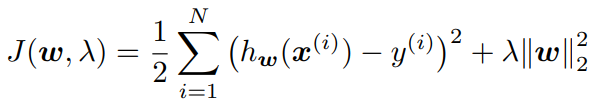

- Lasso Regression

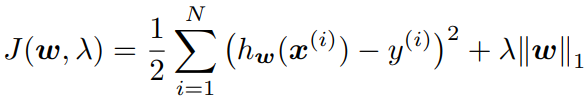

Fungsi loss pada model regularisasi ini hampir sama dengan linear regression biasa, hanya saja ditambahkan term regularisasi di akhir.

Term tambahan pada fungsi loss tersebut berperan seperti bobot penalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

Parameter λ akan menentukan seberapa besar dampak regularisasi pada model yang terbentuk.
- Semakin besar nilai λ menunjukan pengaruh regularization term yang besar pada *loss function* dan berdampak pada nilai bobot ($w$) mengecil sehingga dapat mencegah overfitting
- Semakin kecil nilai λ menunjukan pengaruh regularisasi yang kecil

Ketika nilai λ=0, algoritma yang dilatih sama dengan linear regression biasa tanpa adanya regularisasi.


**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

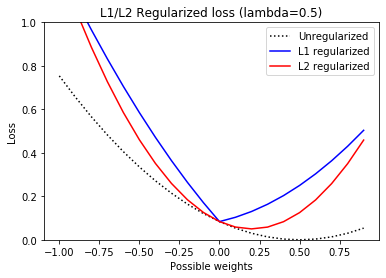

Berikut adalah contoh gambaran dari pengaruh *regularization* terhadap parameter model. Pada saat tidak menggunakan regularisasi, bobot paling optimal adalah 0.5. Regularization membuat pengaruh bobot ($w$) diturunkan. Pada saat tertentu, seperti saat terdapat banyak sekali fitur, hal ini diperlukan untuk mencegah *overfitting* dan meningkatkan kemampuan generalisasi model.

Sumber gambar : [A better visualization of L1 and L2 Regularization](https://medium.com/analytics-vidhya/effects-of-l1-and-l2-regularization-explained-5a916ecf4f06)

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset buatan sebelumnya.

In [3721]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)
ridge.fit(X_train, y_train)

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [-4.62307692]
Intersep persamaan regresi ridge: 
 8.869230769230771


Perhatikan bahwa pengaruh bobot terlihat menurun dibandingkan model *linear regression*. Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

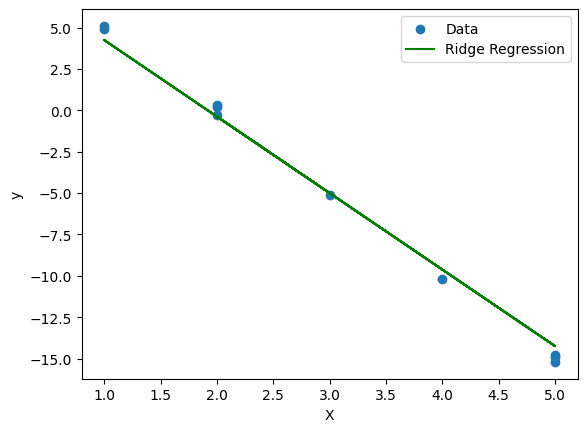

In [3722]:
plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [3723]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [-4.175]
Intersep persamaan regresi lasso: 
 7.5249999999999995


Juga terjadi penurunan pengaruh bobot pada model. Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

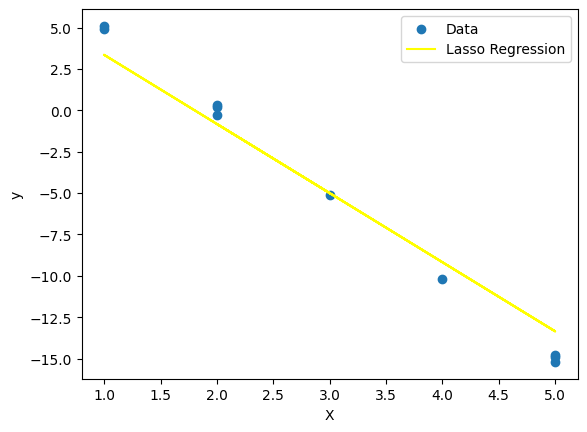

In [3724]:
plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaiki kinerja dari model pada konteks data sederhana yang kita bentuk.

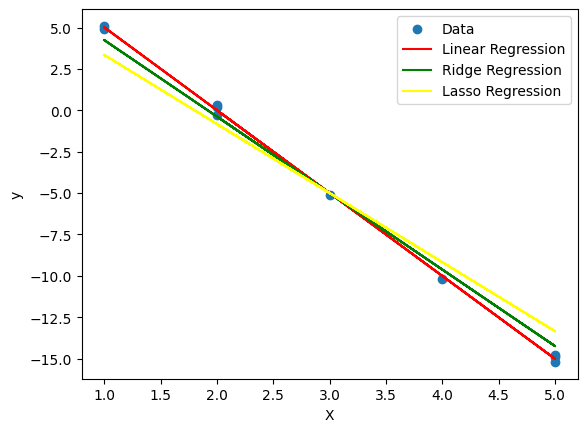

In [3725]:
plt.scatter(X, y_train, label="Data")
y_pred_linear = linear_model.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**NOTE**: Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data mengenai performa akademik siswa. Dataset ini bertujuan untuk mengidentifikasi faktor yang mempengaruhi performa akademik siswa. Terdapat 10.000 *records* dimana setiap setiap *record* mengandung informasi mengenai berbagai faktor atau *predictors* dan sebauah *performa index*.

- **Hours Studied** : The total number of hours spent studying by each student
- **Previous Scores**: The scores obtained by students in previous tests
- **Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No)
- **Sleep Hours**: The average number of hours of sleep the student had per day
- **Sample Question Papers Practiced**: The number of sample question papers the student practiced
- **Performance Index**: A measure of the overall performance of each student.

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

In [3726]:
data_path = 'content/student_performance_v2.csv'

In [3727]:
import pandas as pd

df_student_perf = pd.read_csv(data_path)
df_student_perf.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,2,69,No,8,3.0,45.0
1,5,92,No,5,2.0,77.0
2,1,49,No,8,7.0,26.0
3,8,52,No,9,NaN,45.0
4,8,92,No,9,8.0,88.0


In [3728]:
df_student_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  9049 non-null   float64
 5   Performance Index                 10000 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:

- Handle missing values dan duplikat data
- Melakukan encoding pada data kategorikal
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=42`.
- Melakukan standarisasi pada dataset.

##### Check Null Value

In [3729]:
df_student_perf.isnull()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [3730]:
null_count = df_student_perf.apply(lambda col: col.isnull().sum())
null_count_percentage = df_student_perf.apply(lambda col: col.isnull().mean() * 100)

print("Null Column")
print(null_count)

print("")


print("Null Column Percentage")
print(null_count_percentage)


Null Column
Hours Studied                         0
Previous Scores                       0
Extracurricular Activities            0
Sleep Hours                           0
Sample Question Papers Practiced    951
Performance Index                     0
dtype: int64

Null Column Percentage
Hours Studied                       0.00
Previous Scores                     0.00
Extracurricular Activities          0.00
Sleep Hours                         0.00
Sample Question Papers Practiced    9.51
Performance Index                   0.00
dtype: float64


Terdapat 951 null atau 9.51% data value pada sample question papers practiced.

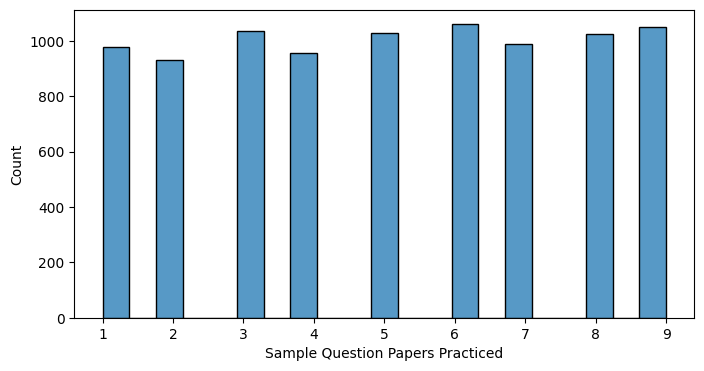

In [3731]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df_student_perf["Sample Question Papers Practiced"])
plt.show()

Dari grafik diatas, distribusi, dan tipe data dari kolom Sample Question Papers Practiced, saya memustukan untuk menggunakan median

In [3732]:
median_value = df_student_perf["Sample Question Papers Practiced"].median()

df_student_perf["Sample Question Papers Practiced"] = df_student_perf["Sample Question Papers Practiced"].apply(lambda x: median_value if pd.isnull(x) else x)

In [3733]:
null_count = df_student_perf.apply(lambda col: col.isnull().sum())
null_count_percentage = df_student_perf.apply(lambda col: col.isnull().mean() * 100)

print("Null Column")
print(null_count)

print("")


print("Null Column Percentage")
print(null_count_percentage)


Null Column
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Null Column Percentage
Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64


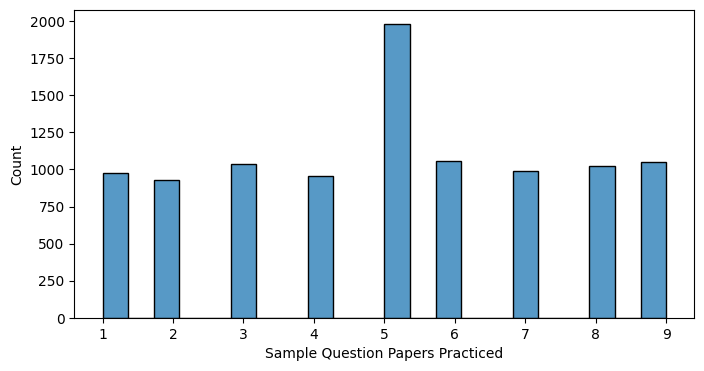

In [3734]:
plt.figure(figsize=(8,4))
sns.histplot(df_student_perf["Sample Question Papers Practiced"])
plt.show()

##### Encoding

Data non numeric terdapat pada Extracurricular Activities

In [3735]:
unique_values = df_student_perf.apply(lambda col: col.unique())
print(unique_values["Extracurricular Activities"])

['No' 'Yes']


Karena datanya hanya ada no dan yes, saya akan menggunakan label encoding

In [3736]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_student_perf['Extracurricular Activities'] = label_encoder.fit_transform(df_student_perf['Extracurricular Activities'])

In [3737]:
print(df_student_perf['Extracurricular Activities'].head())
unique_values = df_student_perf.apply(lambda col: col.unique())
print(unique_values["Extracurricular Activities"])

0    0
1    0
2    0
3    0
4    0
Name: Extracurricular Activities, dtype: int64
[0 1]


##### Split Train Test Data

In [3738]:
X = df_student_perf.drop(columns=["Performance Index"],axis=1)
y = df_student_perf["Performance Index"]

X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,2,69,0,8,3.0
1,5,92,0,5,2.0
2,1,49,0,8,7.0
3,8,52,0,9,5.0
4,8,92,0,9,8.0
...,...,...,...,...,...
9995,7,93,1,5,6.0
9996,3,54,1,4,3.0
9997,3,94,0,5,6.0
9998,4,59,0,9,6.0


In [3739]:
y

,Performance Index
0,45.0
1,77.0
2,26.0
3,45.0
4,88.0
...,...
9995,87.0
9996,35.0
9997,75.0
9998,46.0


In [3740]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Standarisasi Dataset

In [3741]:
numerical_cols = X_train.select_dtypes(include=['number']).columns.difference(['Extracurricular Activities'])
print(numerical_cols)

Index(['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced',
       'Sleep Hours'],
      dtype='object')


In [3742]:
scaler = StandardScaler()

scaler.fit(X_train[numerical_cols])

X_train_scaled_num = scaler.transform(X_train[numerical_cols])
X_test_scaled_num = scaler.transform(X_test[numerical_cols])

X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numerical_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numerical_cols, index=X_test.index)

X_train_scaled = pd.concat([X_train_scaled_num, X_train.drop(columns=numerical_cols)], axis=1)
X_test_scaled = pd.concat([X_test_scaled_num, X_test.drop(columns=numerical_cols)], axis=1)

In [3743]:
X_train_scaled

,Hours Studied,Previous Scores,Sample Question Papers Practiced,Sleep Hours,Extracurricular Activities
9254,1.536697,1.126877,-0.437284,-1.489166,1
1561,1.151342,-0.201162,1.597304,-0.309103,0
1670,-1.546138,-0.143421,1.190387,0.870960,0
6087,1.151342,-0.316643,-0.437284,0.280929,1
6669,-1.546138,-0.951793,-0.030366,0.870960,1
...,...,...,...,...,...
5734,-0.004721,0.029801,-0.844201,-0.899134,0
5191,-0.390075,1.011396,1.597304,-0.899134,0
5390,-1.546138,0.433987,-0.030366,0.280929,1
860,-0.390075,-0.836311,-0.030366,-0.899134,1


In [3744]:
X_test_scaled

,Hours Studied,Previous Scores,Sample Question Papers Practiced,Sleep Hours,Extracurricular Activities
6252,0.380634,1.184618,-1.658037,1.460992,1
4684,-0.004721,-1.413719,1.190387,-0.899134,0
1731,1.151342,0.607210,-0.437284,0.870960,1
4742,0.380634,1.415581,1.190387,0.870960,0
4521,-0.775429,0.145283,1.190387,1.460992,0
...,...,...,...,...,...
6412,-0.775429,0.549469,0.376551,-0.309103,0
8285,0.765988,0.491728,-1.251119,-0.309103,0
7853,-0.775429,0.318506,0.376551,-0.899134,0
1095,-1.160784,1.011396,-0.437284,-0.899134,0


#### Soal 2: Linear Regression

a). Buatlah sebuah model regresi linear menggunakan **salah satu** fitur numerik pada dataset dengan `Performance Index` sebagai target prediksi. Visualisasikan hasil prediksi dengan data test pada fitur tersebut.

In [3745]:
student_regression_linear_one = LinearRegression()
student_regression_linear_one.fit(X_train_scaled[["Previous Scores"]], y_train)

LinearRegression()

In [3746]:
y_prediction_one = student_regression_linear_one.predict(X_test_scaled[["Previous Scores"]])

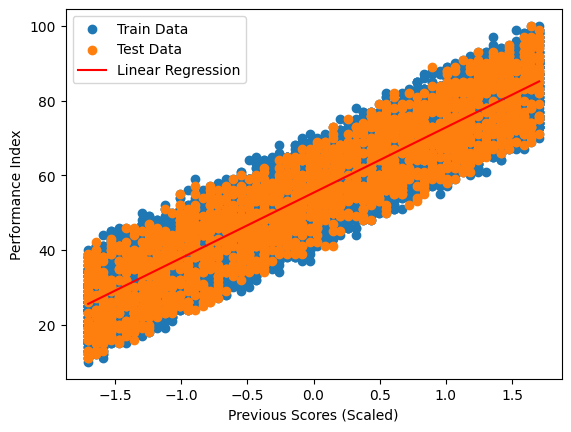

In [3747]:
plt.scatter(X_train_scaled["Previous Scores"], y_train, label="Train Data")
plt.scatter(X_test_scaled["Previous Scores"], y_test, label="Test Data")

sort_idx = np.argsort(X_test_scaled["Previous Scores"])
X_sorted = X_test_scaled["Previous Scores"].iloc[sort_idx]
y_pred_sorted = y_prediction_one[sort_idx]

plt.plot(X_sorted, y_pred_sorted, color='red', label="Linear Regression")

plt.xlabel("Previous Scores (Scaled)")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

**Penjelasan** :

b). Tampilkan metrik evaluasi MAE, MSE, RMSE, dan R-squared untuk hasil prediksi yang sudah dibuat. Lalu lakukan hal yang sama pada model yang dilatih pada **semua** fitur.

In [3748]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def show_regress_metrics(y_t, y_p):
    return pd.DataFrame({
        "Metric": ["MAE", "MSE", "RMSE", "R-squared"],
        "Score": [
            mean_absolute_error(y_t, y_p),
            mean_squared_error(y_t, y_p),
            np.sqrt(mean_squared_error(y_t, y_p)),
            r2_score(y_t, y_p)
        ]
    })

In [3749]:
metrics = show_regress_metrics(y_t=y_test, y_p=y_prediction_one)
metrics

,Metric,Score
0,MAE,6.612672
1,MSE,59.940115
2,RMSE,7.742100
3,R-squared,0.842798


##### Semau Fitur

In [3750]:
all_feature_model = LinearRegression()
all_feature_model.fit(X_train_student, y_train)

LinearRegression()

In [3751]:
y_prediction_all = all_feature_model.predict(X_test_student)

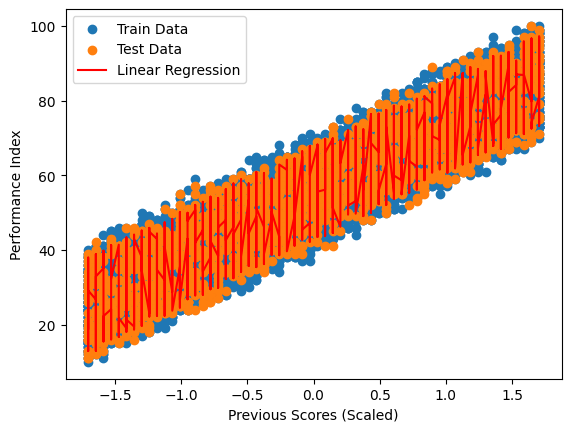

In [3752]:
plt.scatter(X_train_scaled["Previous Scores"], y_train, label="Train Data")
plt.scatter(X_test_scaled["Previous Scores"], y_test, label="Test Data")

sort_idx = np.argsort(X_test_scaled["Previous Scores"])
X_sorted = X_test_scaled["Previous Scores"].iloc[sort_idx]
y_pred_sorted = y_prediction_all[sort_idx]

plt.plot(X_sorted, y_pred_sorted, color='red', label="Linear Regression")

plt.xlabel("Previous Scores (Scaled)")
plt.ylabel("Performance Index")
plt.legend()
plt.show()

In [3753]:
metrics_all = show_regress_metrics(y_t=y_test, y_p=y_prediction_all)
metrics_all

,Metric,Score
0,MAE,1.630809
1,MSE,4.289321
2,RMSE,2.071068
3,R-squared,0.988751


c). Visualisasikan kinerja model regresi (yang telah dilatih pada **semua fitur**) pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

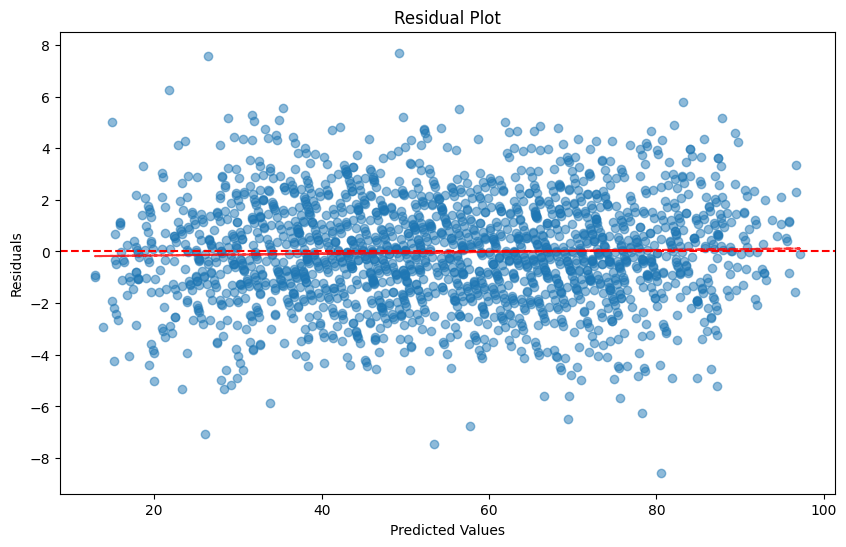

In [3754]:
residuals = y_test - y_prediction_all
plt.figure(figsize=(10, 6))

plt.scatter(y_prediction_all, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

z = np.polyfit(y_prediction_all, residuals, 1)
p = np.poly1d(z)
plt.plot(y_prediction_all, p(y_prediction_all), "r--", alpha=0.8)
plt.show()

**Penjelasan** : Dari residuals plot diatas, dapat dilihat bahwa persebaran titik-titik residual relatif acak dan simetris di sekitar garis nol. Selain itu, residual berada dalam rentang -4 sampai +4 poin, hal tersebut menunjukkan bahwa prediksi model umumnya tidak terlalu jauh dari nilai aktual. Dari residuals plot diatas dapat disimpulkan bahwa model memiliki performa yang baik.

d) Lakukan **cross validation** (jumlah split dibebaskan) pada data latih dan tampilkan nilai R-squared setiap iterasi dan rata-ratanya untuk mendapatkan besaran kinerja sebenarnya dari model.

In [3755]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(all_feature_model,
                           X_train_scaled,
                           y_train,
                           cv=5,
                           scoring='r2')

print("Cross-Validation Scores (R²):")

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")
print("\nCross-Validation Results:")
print(f"Mean R²: {cv_scores.mean():.4f}")

Cross-Validation Scores (R²):
Fold 1: 0.9887
Fold 2: 0.9888
Fold 3: 0.9877
Fold 4: 0.9883
Fold 5: 0.9890

Cross-Validation Results:
Mean R²: 0.9885


e). Berdasarkan parameter dari model yang telah dilatih (menggunakan semua kolom/fitur). Lakukan analisis fitur mana yang paling berpengaruh terhadap prediksi `Performance Index`.

Sebelumnya saya sudah melakukan linear regression dengan hanya menggunakan satu fitur. Dalam memilih fitur tersebut saya menggunakan dasar fitur atau kolom yang memiliki korelasi pearson tertinggi dengan kolom Performance index, berikut adalah nilai korelasi pearson:

In [3756]:
df_student_perf.corr()["Performance Index"]

,Performance Index
Hours Studied,0.373730
Previous Scores,0.915189
Extracurricular Activities,0.024525
Sleep Hours,0.048106
Sample Question Papers Practiced,0.027594
Performance Index,1.000000


Dari table diatas, dapat dilihat bahwa previous scores memiliki korelasi paling tinggi. Untuk membuktikan bahwa previous score adalah features yang paling berpengaruh, saya akan menggunakan KBest dengan n=1

In [3757]:
from sklearn.feature_selection import SelectKBest,f_regression

kbest = SelectKBest(score_func=f_regression, k=1)
X_kbest = kbest.fit_transform(X, y)
selected_features = X.columns[kbest.get_support()]

print("Selected feature(s):", selected_features.tolist())

Selected feature(s): ['Previous Scores']


Dari kedua bukti diatas, dapat saya simpulkan bahwa previous scores adalah fitur yang paling berpengaruh terhadap prediksi *Performance Index*

#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *lasso regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

In [3758]:
#random_alphas = np.random.uniform(0.01, 1, 10)

choosed_alphas = [2.16687832, 8.70003811,3.8051423, 5.48202902, 6.93181805, 5.61160189
, 1.32820689, 9.15462569,0.41015153, 9.42444553]

choosed_alphas.sort()
choosed_alphas

[0.41015153,
 1.32820689,
 2.16687832,
 3.8051423,
 5.48202902,
 5.61160189,
 6.93181805,
 8.70003811,
 9.15462569,
 9.42444553]

In [3759]:
all_lasso_models = []

for alpha in choosed_alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    list_value = (alpha, lasso)
    all_lasso_models.append(list_value)

b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *lasso regression* pada *testing dataset*.

In [3760]:
for alpha, model in all_lasso_models:
    print(f"Metrics for alpha: {alpha}")
    y_prediction_lasso = model.predict(X_test_scaled)
    metrics = show_regress_metrics(y_t=y_test, y_p=y_prediction_lasso)
    print(metrics)
    print("")

Metrics for alpha: 0.41015153
      Metric     Score
0        MAE  1.818440
1        MSE  5.213722
2       RMSE  2.283358
3  R-squared  0.986326

Metrics for alpha: 1.32820689
      Metric     Score
0        MAE  2.452626
1        MSE  9.325329
2       RMSE  3.053740
3  R-squared  0.975543

Metrics for alpha: 2.16687832
      Metric      Score
0        MAE   3.173709
1        MSE  15.684510
2       RMSE   3.960367
3  R-squared   0.958865

Metrics for alpha: 3.8051423
      Metric      Score
0        MAE   4.874661
1        MSE  36.692930
2       RMSE   6.057469
3  R-squared   0.903767

Metrics for alpha: 5.48202902
      Metric      Score
0        MAE   6.751763
1        MSE  69.959630
2       RMSE   8.364187
3  R-squared   0.816520

Metrics for alpha: 5.61160189
      Metric      Score
0        MAE   6.899518
1        MSE  73.025428
2       RMSE   8.545492
3  R-squared   0.808480

Metrics for alpha: 6.93181805
      Metric       Score
0        MAE    8.417688
1        MSE  108.312852


c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan Residuals Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

Dari model yang sudah dilihat metricsnya di atas, dapat disimpulkan bahwa dari 10 alpha yang  berikan, alpha terbaik ada pada value 0.41

In [3761]:
final_lasso = Lasso(alpha=0.41015153)
final_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.41015153)

In [3762]:
y_final_lasso_prediction = final_lasso.predict(X_test_scaled)

In [3763]:
show_regress_metrics(y_test, y_final_lasso_prediction)

,Metric,Score
0,MAE,1.818440
1,MSE,5.213722
2,RMSE,2.283358
3,R-squared,0.986326


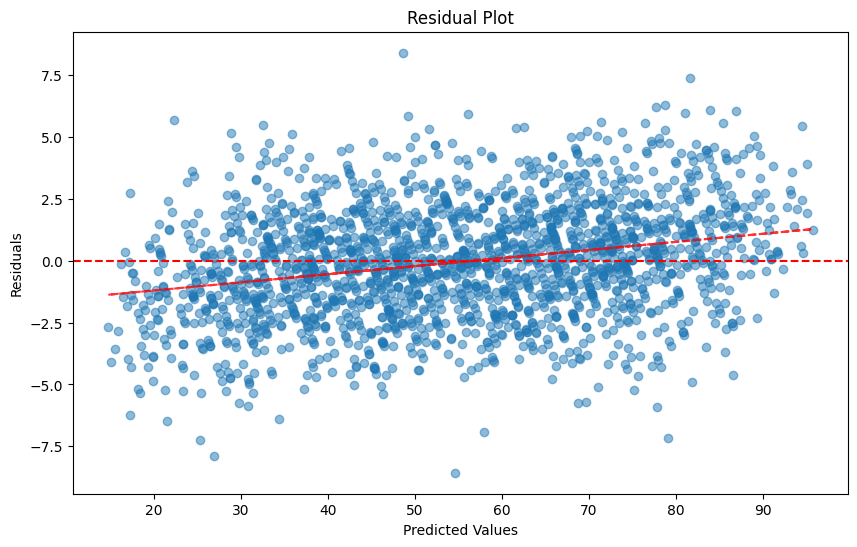

In [3764]:
residuals = y_test - y_final_lasso_prediction
plt.figure(figsize=(10, 6))

plt.scatter(y_final_lasso_prediction, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

z = np.polyfit(y_final_lasso_prediction, residuals, 1)
p = np.poly1d(z)
plt.plot(y_final_lasso_prediction, p(y_final_lasso_prediction), "r--", alpha=0.8)
plt.show()

Dari visualisasi residuals plot diatas, dapat dilihat bahwa terdapat pattern yang memiliki trend naik (dapat dilihat di garis merah putus-putus), hal tersebut menandakan adanya kemungkinan bias ketika melakukan prediksi. Namun, dikarenakan model yang digunakan adalah lasso, hal tersebut masih dibatas wajar dan perlu diingat bahwa alpha yang digunakan adalah 0.41. Untuk persebaran dari hasil prediksi juga cukup baik, berada di sekitar 0 dengan range +2.5 hingga -2.5. Dapat disimpulkan, model lasso yang dibuat sudah cukup baik.

**Penjelasan** :

d). Berikan analisis terkait hubungan perubahan nilai parameter alpha, parameter model, dan nilai R-squared. Tambahkan kode untuk mendukung jawaban Anda.

**Penjelasan** :

Berdasarkan percobaan yang saya lakukan pada bagian B, dapat dilihat bahwa perbedaan alpha dapat memengaruhi nilai dari R_squared. Hal tersebut disebabkan nilai alpha merupakan nilai konstan yang berpengaruh terhadap regularisasi L1. Semakin besar alpha maka semakin banyak koefisien yang dikompress hingga 0. Untuk membuktikan nilai alpha memengerahui, berikut lampiran beberapa nilai alpha beserta dengan metricsnya.

In [3765]:
for alpha, model in all_lasso_models:
    print(f"Metrics for alpha: {alpha}")
    y_prediction_lasso = model.predict(X_test_scaled)
    metrics = show_regress_metrics(y_t=y_test, y_p=y_prediction_lasso)
    print(metrics)
    print("")

Metrics for alpha: 0.41015153
      Metric     Score
0        MAE  1.818440
1        MSE  5.213722
2       RMSE  2.283358
3  R-squared  0.986326

Metrics for alpha: 1.32820689
      Metric     Score
0        MAE  2.452626
1        MSE  9.325329
2       RMSE  3.053740
3  R-squared  0.975543

Metrics for alpha: 2.16687832
      Metric      Score
0        MAE   3.173709
1        MSE  15.684510
2       RMSE   3.960367
3  R-squared   0.958865

Metrics for alpha: 3.8051423
      Metric      Score
0        MAE   4.874661
1        MSE  36.692930
2       RMSE   6.057469
3  R-squared   0.903767

Metrics for alpha: 5.48202902
      Metric      Score
0        MAE   6.751763
1        MSE  69.959630
2       RMSE   8.364187
3  R-squared   0.816520

Metrics for alpha: 5.61160189
      Metric      Score
0        MAE   6.899518
1        MSE  73.025428
2       RMSE   8.545492
3  R-squared   0.808480

Metrics for alpha: 6.93181805
      Metric       Score
0        MAE    8.417688
1        MSE  108.312852


Dari metrics diatas, dapat dilihat bahwa semakin besar nilai alpha, semakin besar juga featuresnya yang dikompress menjadi 0, sehingga menyebabkan turunnya akurasi, nilai RMSE, dan nilai R-squared. Dengan demikian nilai alpha memengaruhi paramater dan metrics dari lasso regressor.

**References**
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com)

e). Buatlah satu model lasso lagi dengan nilai alpha = 15. Lalu tampilkan koefisien/parameter dari model.

In [3766]:
alpha_fiveteen_lasso = Lasso(alpha=15)
alpha_fiveteen_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=15)

In [3767]:
print("Koefisien persamaan regresi lasso:\n", alpha_fiveteen_lasso.coef_)
print("Intersep persamaan regresi lasso:\n", alpha_fiveteen_lasso.intercept_)

Koefisien persamaan regresi lasso:
 [0.         2.49338557 0.         0.         0.        ]
Intersep persamaan regresi lasso:
 55.32675


#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a). Buatlah sebuah list alpha yang berisi minimal 5 bual alpha. Kemudian buatlah (*fit*) model *ridge regression* berdasarkan dataset sebelumnya dan alpha yang telah dipilih.

In [3768]:
# random_alphas = np.random.uniform(0.01,   10, 10)

choosed_alphas = [0.16466357649726118,
 3.267739493292107,
 4.234243399469776,
 4.237641559662084,
 6.352278026479394,
 6.637277228786829,
 8.800782072304173,
 9.010057158513717,
 9.203694821668462,
 9.645436535285366]

choosed_alphas.sort()
choosed_alphas

[0.16466357649726118,
 3.267739493292107,
 4.234243399469776,
 4.237641559662084,
 6.352278026479394,
 6.637277228786829,
 8.800782072304173,
 9.010057158513717,
 9.203694821668462,
 9.645436535285366]

b). Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model *ridge regression* pada *testing dataset*.

In [3769]:
ridge_models = []

for alpha in choosed_alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    list_value = (alpha, ridge)
    ridge_models.append(list_value)


In [3770]:
for alpha, model in ridge_models:
    print(f"Metrics for alpha: {alpha}")
    y_prediction_ridge = model.predict(X_test_scaled)
    metrics = show_regress_metrics(y_t=y_test, y_p=y_prediction_ridge)
    print(metrics)
    print("")

Metrics for alpha: 0.16466357649726118
      Metric     Score
0        MAE  1.630826
1        MSE  4.289377
2       RMSE  2.071081
3  R-squared  0.988750

Metrics for alpha: 3.267739493292107
      Metric     Score
0        MAE  1.631139
1        MSE  4.290485
2       RMSE  2.071349
3  R-squared  0.988748

Metrics for alpha: 4.234243399469776
      Metric     Score
0        MAE  1.631242
1        MSE  4.290854
2       RMSE  2.071438
3  R-squared  0.988747

Metrics for alpha: 4.237641559662084
      Metric     Score
0        MAE  1.631243
1        MSE  4.290855
2       RMSE  2.071438
3  R-squared  0.988747

Metrics for alpha: 6.352278026479394
      Metric     Score
0        MAE  1.631479
1        MSE  4.291701
2       RMSE  2.071642
3  R-squared  0.988744

Metrics for alpha: 6.637277228786829
      Metric     Score
0        MAE  1.631512
1        MSE  4.291819
2       RMSE  2.071671
3  R-squared  0.988744

Metrics for alpha: 8.800782072304173
      Metric     Score
0        MAE  1.6317

c). Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan. Visualisasikan kinerja model regresi lasso tersebut pada keseluruhan data uji menggunakan perbandingan hasil prediksi dan aktual atau Prediction Error Plot. Analisis dan berikan insight anda terkait dengan visualisasi tersebut.

Sesuai dengan data di atas, saya akan memilih alpha 0.16

In [3771]:
choosed_alpha =0.16466357649726118
final_ridge_model = Ridge(alpha=choosed_alpha)

final_ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.16466357649726118)

In [3772]:
y_ridge_prediction = final_ridge_model.predict(X_test_scaled)

In [3773]:
show_regress_metrics(y_t=y_test, y_p=y_ridge_prediction)

,Metric,Score
0,MAE,1.630826
1,MSE,4.289377
2,RMSE,2.071081
3,R-squared,0.988750


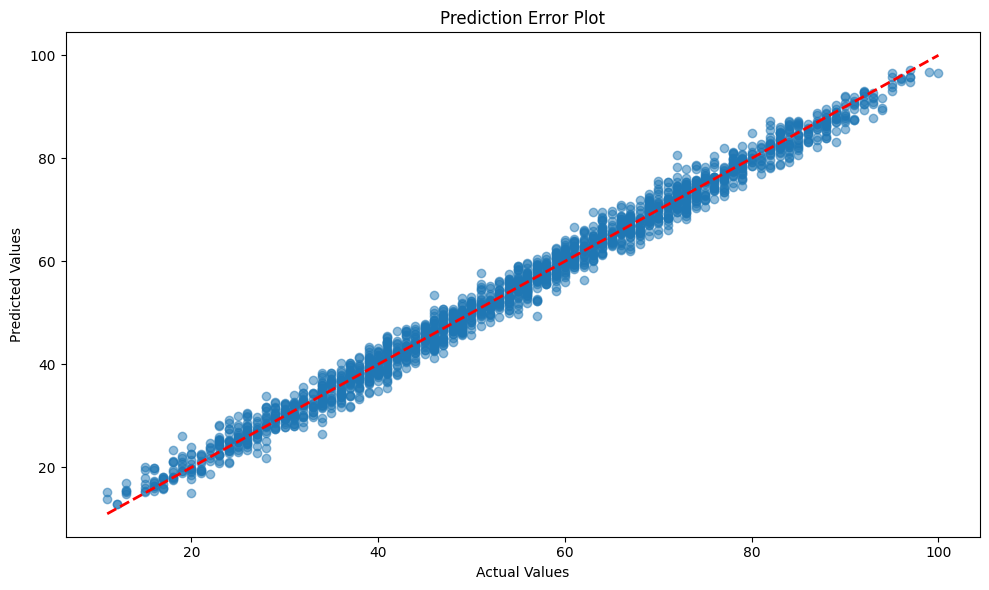

In [3774]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_ridge_prediction, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction Error Plot")

plt.tight_layout()
plt.show()

Pada prediction diatas, dapat dilihat bahwa persebaran prediksi sesuai dengan garis putus-putus berwarna merah yang merupakan nilai ekspektasi dari data aktual. Dari plot diatas dapat dilihat bahwa hasil dari ridge regression sudah sangat baik dan perseberan prediksinya sesuai dengan persebaran nilai aktual.

**Penjelasan** :

d). Buatlah model ridge dengan nilai alpha yang sangat besar, misalnya aplha = 10000. Bandingkan hasil yang didapat dengan nomor 3e. Berdasarkan perbandingan tersebut, jelaskan perbedaan karakteristik antara model Lasso dan Ridge. Sertakan **sumber** anda.

In [3775]:
large_alpha_ridge_model = Ridge(alpha=10000)
large_alpha_ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=10000)

In [3776]:
y_large_prediction_ridge = large_alpha_ridge_model.predict(X_test_scaled)

In [3777]:
show_regress_metrics(y_t=y_test, y_p=y_large_prediction_ridge)

,Metric,Score
0,MAE,9.294871
1,MSE,122.807530
2,RMSE,11.081856
3,R-squared,0.677919


In [3778]:
print("Koefisien persamaan regresi ridge:\n", large_alpha_ridge_model.coef_)
print("Intersep persamaan regresi ridge:\n", large_alpha_ridge_model.intercept_)

Koefisien persamaan regresi ridge:
 [3.1983816  7.80274713 0.21461436 0.39588415 0.16299862]
Intersep persamaan regresi ridge:
 55.24573968754276


In [3779]:
print("Koefisien persamaan regresi lasso:\n", alpha_fiveteen_lasso.coef_)
print("Intersep persamaan regresi lasso:\n", alpha_fiveteen_lasso.intercept_)

Koefisien persamaan regresi lasso:
 [0.         2.49338557 0.         0.         0.        ]
Intersep persamaan regresi lasso:
 55.32675


Dari kedua data di atas, dapat dilihat karakteristik paramater alpha di kedua model mengashilkan dampak berbeda, terutama di koefisien setiap fitur.

Pada lasso regression, koefisien fitur 1 3 4 5 mendekati 0, sedangkan hanya fitur 2 yang memiliki koefisien. Hal tersebut disebabkan pada nomor 3e alpha yang dipilih untuk lasso adalah 15 (alpha bernilai besar). Sedangkan koefisien sangat berbeda pada regresi ridge, hal tersebut dikarenakan regresi ridge hanya mengecilkan koefisien namun tidak dapat sampai 0 mengeleminasi suatu fitur.

**References**
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com)
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

**Penjelasan** :

e). Model manakah yang dapat digunakan untuk *feature selection*? berikan alasan secara singkat!

**Penjelasan** :

Berdasarkan penjelasan paramater alpha di kedua ridge dan lasso. Lasso regressor lebih baik digunakan sebagai feature selection. Dikarenakan, lasso regressor dapat eleminiasi suatu fitur dan membuat koefision suatu fitur menjadi 0. Dengan demikian, lasso regression lebih baik digunakan untuk feature selection.

**References**
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?utm_source=chatgpt.com)
- [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

## Intro to Linear Models for Classification

### Logistic Regression

Logistic regression adalah model linear yang hampir mirip dengan linear regression. Namun, alih-alih memprediksi nilai kontinu, logistic regression hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor, atau lebih tepatnya binary classifier. Contoh visualisasinya adalah sebagai berikut.

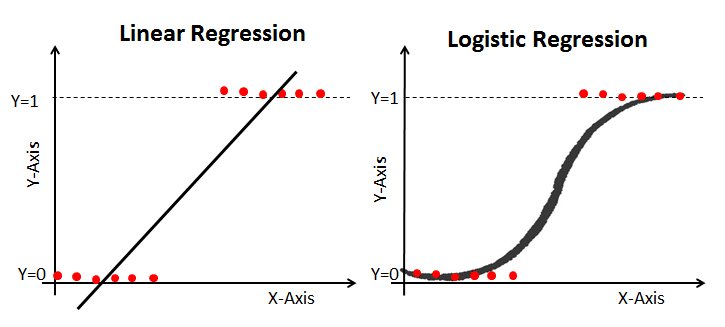

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

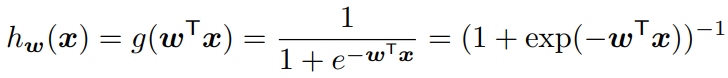

Model logistic regression memanfaatkan fungsi sigmoid $g=\frac{1}{1+e^{-z}}$ untuk mentransformasi hasil perkalian $z=w^Tx$ yang merupakan persamaan linear menjadi rentang 0-1. Output dari fungsi sigmoid mencerminkan peluang suatu data diklasifikasi sebagai kelas 1. Untuk mengubah bentuk peluang menjadi kelas, diperlukan threshold yang membatasi penentuan kelas sesuai dengan keperluan dari dataset (tidak mesti 0.5). Pemilihan threshold ini dapat dipilih menggunakan berbagai metode, salah satunya dengan ROC Curve, yang dapat Anda dalami lebih lanjut melalui slide.

![Logistic regression threshold](https://miro.medium.com/v2/resize:fit:483/0*KZu2_AY6Oxr86dWd.png)

Sumber gambar: https://morihosseini.medium.com/mastering-logistic-regression-thresholds-b34fe07f09f5

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, tidak seperti linear regression yang meminimalkan perbedaan hasil prediksi, di sini logistic regression memaksimalkan kesamaan hasil prediksi dengan data aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa Anda pelajari sendiri dari slide). Berikut adalah persamaan likelihood yang ingin dimaksimalkan tersebut.

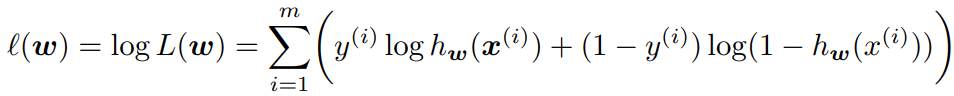

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.

In [3780]:
# Membentuk data buatan
x1  = np.array([6, 9, 4, 6, 8, 4, 6, 2, 9, 2, 7, 6])
x2  = np.array([8, 7, 3, 5, 9, 6, 7, 5, 9, 3, 8, 2])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.where((x1 > 5) & (x2 > 5), 1, 0)

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[6 8]
 [9 7]
 [4 3]
 [6 5]
 [8 9]
 [4 6]
 [6 7]
 [2 5]
 [9 9]
 [2 3]
 [7 8]
 [6 2]]
y:  [1 1 0 0 1 0 1 0 1 0 1 0]


In [3781]:
# Melatih logistic regression pada training set
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [3782]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan
X_test = np.array([[8, 5], [3, 6]])
y_test = np.array([0, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[1 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. Kita dapat menggambar garis *decision boundary* berdasarkan koefisien dan *intercept* dari model.

In [3783]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-10.603683288607654, 0.7075177877076285, 1.0549551066824836]


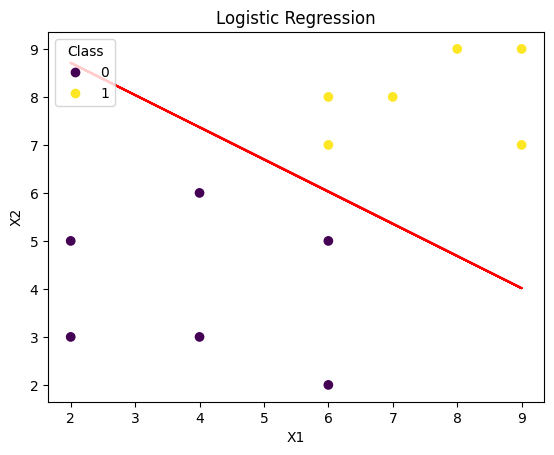

In [3784]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [3785]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian ini adalah data terkait *loan approval*. Model yang akan dibuat akan memprediksi apakah pinjaman akan diterima atau tidak. Berikut adalah kolom-kolom yang ada pada dataset.

- person_age : Age of the person
- person_income : Annual Income
- person_emp_exp : Years of employment experience
- loan_amnt : Loan amount requested
- loan_int_rate : Loan interest rate
- loan_percent_income : Loan amount as a percentage of annual income
- cb_person_cred_hist_length : 	Length of credit history in years
- credit_score : Credit score of the person
- loan_status (target) : Loan approval status (approved or rejected)

Sumber data dan penjelasan : https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

In [3786]:
df_loan = pd.read_csv('content/loan_data_v2.csv')
df_loan.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,Approved
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Rejected
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,Approved
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,Approved
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,Approved


In [3787]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45002 entries, 0 to 45001
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  43652 non-null  float64
 1   person_income               45002 non-null  float64
 2   person_emp_exp              45002 non-null  int64  
 3   loan_amnt                   45002 non-null  float64
 4   loan_int_rate               45002 non-null  float64
 5   loan_percent_income         45002 non-null  float64
 6   cb_person_cred_hist_length  45002 non-null  float64
 7   credit_score                45002 non-null  int64  
 8   loan_status                 45002 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 3.1+ MB


#### Soal 5: Logistic Regression

a). Lakukan *data preprocessing* pada dataframe meliputi pengecekan dan penanganan *missing values*, data duplikat, dan *encoding* pada kolom kategorikal. Terakhir, lakukan pembagian dataset menjadi training dan testing dengan ukuran training 80% dan testing 20%. Gunakan `random_state=42` untuk *splitting*.

In [3788]:
df_loan.isnull()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
44997,False,False,False,False,False,False,False,False,False
44998,False,False,False,False,False,False,False,False,False
44999,False,False,False,False,False,False,False,False,False
45000,False,False,False,False,False,False,False,False,False


In [3789]:
null_count = df_loan.apply(lambda col: col.isnull().sum())
null_count_percentage = df_loan.apply(lambda col: col.isnull().mean() * 100)

print("Null Column")
print(null_count)

print("")


print("Null Column Percentage")
print(null_count_percentage)

Null Column
person_age                    1350
person_income                    0
person_emp_exp                   0
loan_amnt                        0
loan_int_rate                    0
loan_percent_income              0
cb_person_cred_hist_length       0
credit_score                     0
loan_status                      0
dtype: int64

Null Column Percentage
person_age                    2.999867
person_income                 0.000000
person_emp_exp                0.000000
loan_amnt                     0.000000
loan_int_rate                 0.000000
loan_percent_income           0.000000
cb_person_cred_hist_length    0.000000
credit_score                  0.000000
loan_status                   0.000000
dtype: float64


Person age memiliki 1350 null value atau 2.9% dari dataset

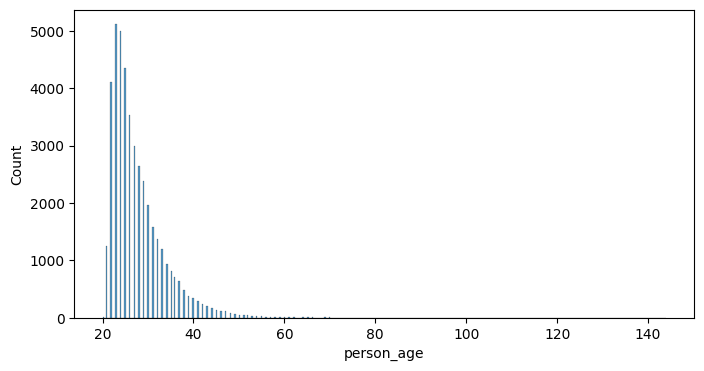

In [3790]:
plt.figure(figsize=(8,4))
sns.histplot(df_loan["person_age"])
plt.show()

Karena distribusinya skew dan data age numerik, untuk data imputation saya akan mengisi null value dengan median.

In [3791]:
median_value = df_loan["person_age"].median()
df_loan["person_age"] = df_loan["person_age"].apply(lambda x: median_value if pd.isnull(x) else x)

In [3792]:
null_count = df_loan.apply(lambda col: col.isnull().sum())
null_count_percentage = df_loan.apply(lambda col: col.isnull().mean() * 100)

print("Null Column")
print(null_count)

print("")


print("Null Column Percentage")
print(null_count_percentage)

Null Column
person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
loan_status                   0
dtype: int64

Null Column Percentage
person_age                    0.0
person_income                 0.0
person_emp_exp                0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_percent_income           0.0
cb_person_cred_hist_length    0.0
credit_score                  0.0
loan_status                   0.0
dtype: float64


Sudah tidak ada null value

In [3793]:
unique_values = df_loan.apply(lambda col: col.unique())
unique_values

,0
person_age,"[22.0, 21.0, 25.0, 23.0, 24.0, 26.0, 144.0, 12..."
person_income,"[71948.0, 12282.0, 12438.0, 79753.0, 66135.0, ..."
person_emp_exp,"[0, 3, 1, 5, 4, 2, 7, 6, 125, 8, 121, 101, 100..."
loan_amnt,"[35000.0, 1000.0, 5500.0, 2500.0, 1600.0, 4500..."
loan_int_rate,"[16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.4..."
loan_percent_income,"[0.49, 0.08, 0.44, 0.53, 0.19, 0.37, 0.35, 0.1..."
cb_person_cred_hist_length,"[3.0, 2.0, 4.0, 8.0, 7.0, 6.0, 9.0, 10.0, 5.0,..."
credit_score,"[561, 504, 635, 675, 586, 532, 701, 585, 544, ..."
loan_status,"[Approved, Rejected]"


##### Encoding loan_status

loan_status hanya terdiri dari approved dan rejected. Oleh karena itu, saya akan menggunakan label encoder

In [3794]:
label_encoder = LabelEncoder()

df_loan["loan_status"] = label_encoder.fit_transform(df_loan["loan_status"])

In [3795]:
unique_values = df_loan.apply(lambda col: col.unique())
print(unique_values)

df_loan.info()

person_age                    [22.0, 21.0, 25.0, 23.0, 24.0, 26.0, 144.0, 12...
person_income                 [71948.0, 12282.0, 12438.0, 79753.0, 66135.0, ...
person_emp_exp                [0, 3, 1, 5, 4, 2, 7, 6, 125, 8, 121, 101, 100...
loan_amnt                     [35000.0, 1000.0, 5500.0, 2500.0, 1600.0, 4500...
loan_int_rate                 [16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.4...
loan_percent_income           [0.49, 0.08, 0.44, 0.53, 0.19, 0.37, 0.35, 0.1...
cb_person_cred_hist_length    [3.0, 2.0, 4.0, 8.0, 7.0, 6.0, 9.0, 10.0, 5.0,...
credit_score                  [561, 504, 635, 675, 586, 532, 701, 585, 544, ...
loan_status                                                              [0, 1]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45002 entries, 0 to 45001
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  45002 non-n

Seluruh data sudah numerikal

##### Split Data

In [3796]:
X = df_loan.drop(columns=["loan_status"],axis=1)
y = df_loan["loan_status"]

In [3797]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, dan Recall.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

In [3798]:
loan_logistic_regression_model = LogisticRegression(max_iter=1000)
loan_logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [3799]:
y_loan_not_scaled_prediction = loan_logistic_regression_model.predict(X_test)

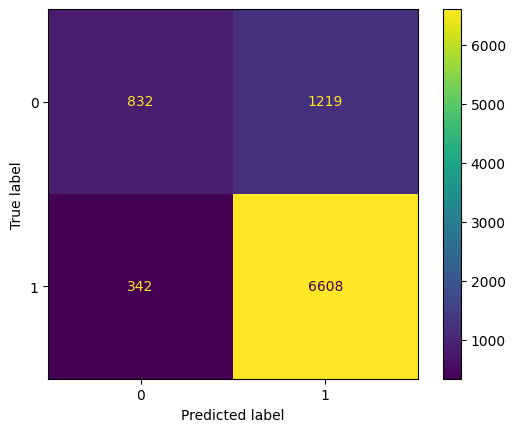

In [3800]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_loan_not_scaled_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loan_logistic_regression_model.classes_)
disp.plot()
plt.show()

In [3801]:
def show_metrics(y_t, y_p):
    return pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
        "Score": [
            accuracy_score(y_t, y_p),
            precision_score(y_t, y_p),
            recall_score(y_t, y_p),
            f1_score(y_t, y_p)
        ]
    })

show_metrics(y_t=y_test, y_p=y_loan_not_scaled_prediction)


,Metric,Score
0,Accuracy,0.826575
1,Precision,0.844257
2,Recall,0.950791
3,F1-Score,0.894363


c). Lakukan standarisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [3802]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [3803]:
X_train_scaled

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
36075,1.064131,0.556322,0.432079,0.384757,-1.234712,-0.453997,1.328523,0.503226
27536,0.219474,1.112433,0.598007,-0.285056,1.327180,-1.028167,-0.221856,0.284909
5321,-0.456253,-0.598095,-0.895347,-0.170117,0.047908,1.153680,-0.738649,0.046745
40568,1.233063,2.287025,1.261720,2.207281,0.034513,-0.568831,0.811730,1.892516
32755,0.388405,-0.273358,0.266151,-0.170117,0.600473,0.005340,1.070127,0.979554
...,...,...,...,...,...,...,...,...
11284,-0.287321,0.107599,0.100222,0.166771,-1.663369,-0.224328,-0.480253,-1.461627
44732,-0.456253,-0.603981,-0.397562,-0.586115,0.232097,0.349842,-0.480253,0.284909
38158,0.895200,-0.291863,0.598007,0.179770,-0.086047,0.464676,0.811730,0.384144
860,-0.287321,1.302659,0.100222,1.653041,2.341891,-0.339163,-0.738649,-0.568512


In [3804]:
X_test_scaled

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
3519,-0.963047,-0.331937,-0.895347,0.146954,-1.341877,0.579510,-0.997046,-0.965452
33152,-0.287321,-0.478829,0.100222,-0.090850,-0.913220,0.694344,-0.221856,-0.826523
14680,-0.287321,-0.606976,-0.895347,1.137801,-1.043826,3.909697,-0.480253,-1.719638
30744,-0.287321,0.062621,1.261720,-0.185971,-1.174433,-0.453997,2.362110,-0.112031
6663,-0.963047,-0.176760,-0.895347,-0.566456,1.096108,-0.568831,-0.997046,-0.032643
...,...,...,...,...,...,...,...,...
37458,-0.287321,-0.256695,-0.065706,0.067686,-0.873033,0.235008,-0.480253,0.820778
25033,0.557337,0.220701,0.598007,1.653041,-0.702241,0.809178,1.070127,-0.350195
25383,0.219474,0.285232,0.266151,1.653041,0.278981,0.694344,-0.221856,-0.211266
38673,0.557337,0.315509,0.598007,-0.724992,-0.092745,-1.028167,0.553334,-1.679944


d). Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set. Hasil evaluasi mencakup Akurasi, F1-Score, Precision, Recall.

In [3805]:
loan_logistic_scaled_regression_model = LogisticRegression(max_iter=1000)
loan_logistic_scaled_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [3806]:
y_loan_prediction_scaled = loan_logistic_regression_model.predict(X_test_scaled)

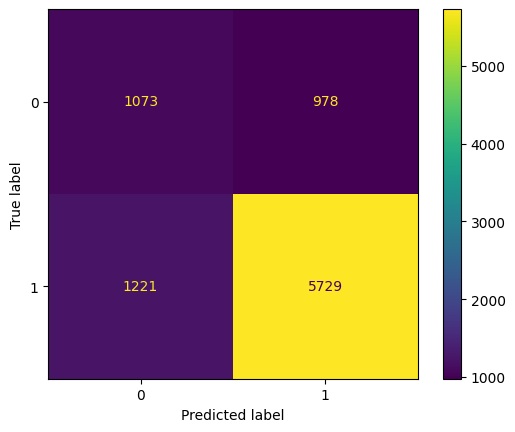

In [3807]:
cm = confusion_matrix(y_test, y_loan_prediction_scaled)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loan_logistic_regression_model.classes_)
disp.plot()
plt.show()

In [3808]:
show_metrics(y_t=y_test, y_p=y_loan_prediction_scaled)

,Metric,Score
0,Accuracy,0.755694
1,Precision,0.854182
2,Recall,0.824317
3,F1-Score,0.838984


e) Dari kedua model yang dibangun dengan data yang distandarisasi dan data yang tidak distandarisasi, Apakah terdapat perbedaan performa? Berikan analisis Anda terkait penyebab hal tersebut dan sertakan **sumber** anda!

**Penjelasan** :

f). Berdasarkan parameter dari model yang telah dilatih, Identifikasilah fitur-fitur penting atau paling berpengaruh! Tampilkan tingkat kepentingan fitur dalam bentuk grafik!

In [3810]:
coef = loan_logistic_regression_model.coef_
coef

array([[-4.49933192e-02,  9.32252843e-07,  3.54053575e-02,
         8.96115792e-05, -3.31857082e-01, -1.38882399e+01,
         9.97194900e-03, -4.73595790e-04]])

In [3812]:
feature_importance = np.mean(np.abs(coef), axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

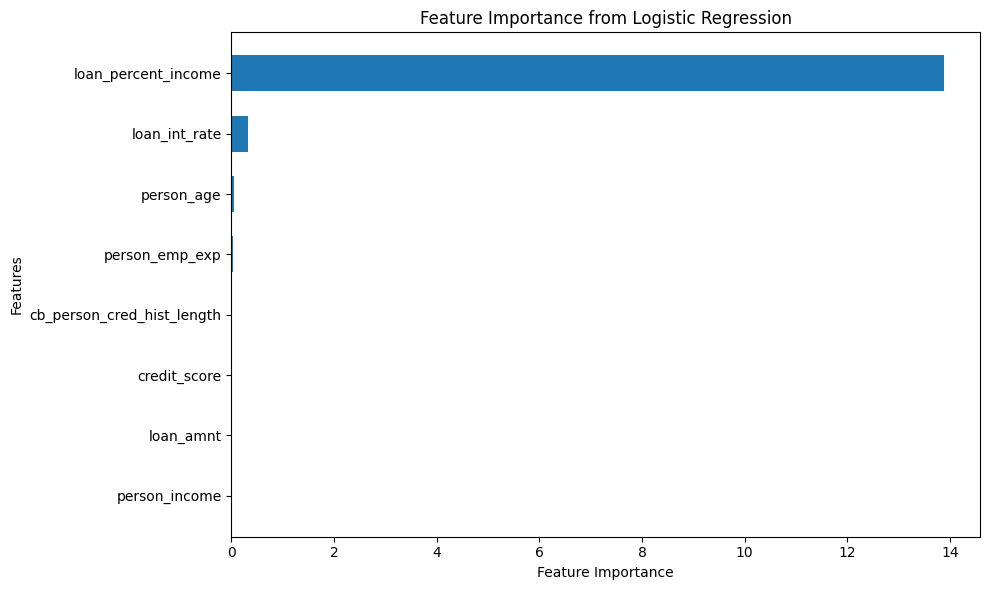

In [3813]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], height=0.6)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Dari model diatas, dapat dilihat bahwa fitur yang paling berpengaruh adalah loan_percent_income

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

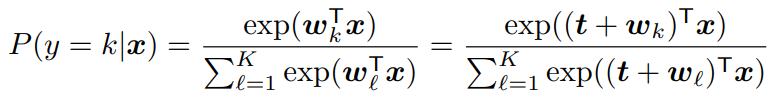

Persamaan likelihood softmaxe regression:

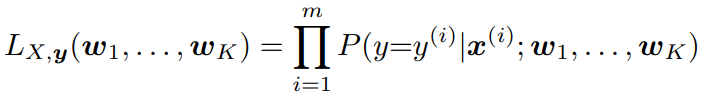

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [ ]:
# Membentuk data buatan
x1  = np.array([2, 7, 5, 2, 1, 7, 5, 7, 2, 3])
x2  = np.array([2, 3, 5, 6, 3, 4, 3, 6, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([2, 1, 1, 0, 2, 1, 1, 1, 2, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

In [ ]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set
softmax = LogisticRegression(multi_class='multinomial')

softmax.fit(X_train, y_softmax_train)

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [ ]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan
X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([2, 1])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [ ]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
print(softmax.intercept_, softmax.coef_)

In [ ]:
# Plotting decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

In [ ]:
# Plotting decision boundary dengan contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model berhasil memprediksi benar pada semua (2 buah) data uji. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [ ]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

### Penjelasan Dataset untuk Softmax Regression

Dataset yang digunakan pada bagian softmax regression adalah data terkait klasifikasi jenis perilaku pengguna *smartphones*. Berikut penjelasan masing-masing kolom pada data.

- User ID: Unique identifier for each user.
- Device Model: Model of the user's smartphone.
Operating System: The OS of the device (iOS or Android).
- App Usage Time: Daily time spent on mobile applications, measured in minutes.
- Screen On Time: Average hours per day the screen is active.
- Battery Drain: Daily battery consumption in mAh.
- Number of Apps Installed: Total apps available on the device.
- Data Usage: Daily mobile data consumption in megabytes.
- Age: Age of the user.
- Gender: Gender of the user (Male or Female).
- User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).

Sumber data dan penjelasan: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset

In [ ]:
data_path = 'content/user_behavior_dataset.csv'
df_user = pd.read_csv(data_path)

df_user.head()

In [ ]:
df_user.info()

#### Soal 6: Softmax Regression

a). Buang kolom yang tidak diperlukan (`ID`) dan lakukan One Hot Encoding pada fitur kategorikal. Lalu, bagi dataset menjadi training dan testing dengan rasio 80:20. Gunakan `random_state=42`.

In [ ]:
df_user = df_user.drop(columns=["User ID"], axis=1)

In [ ]:
unique_values = df_user.apply(lambda col: col.unique())
print(unique_values)

df_user.info()

In [ ]:
categorical_columns = ["Device Model", "Operating System", "Gender"]
df_user_encoded = pd.get_dummies(df_user, columns=categorical_columns, drop_first=True)

In [ ]:
df_user_encoded

In [ ]:
X = df_user_encoded.drop(columns=["User Behavior Class"], axis=1)
y = df_user_encoded["User Behavior Class"]

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

b). Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [ ]:
X_train

In [ ]:
numerical_cols = ["App Usage Time (min/day)", "Screen On Time (hours/day)", "Battery Drain (mAh/day)", "Number of Apps Installed", "Data Usage (MB/day)", "Age"]

scaler.fit(X_train[numerical_cols])

X_train_scaled_num = scaler.transform(X_train[numerical_cols])
X_test_scaled_num = scaler.transform(X_test[numerical_cols])

X_train_scaled_num = pd.DataFrame(X_train_scaled_num, columns=numerical_cols, index=X_train.index)
X_test_scaled_num = pd.DataFrame(X_test_scaled_num, columns=numerical_cols, index=X_test.index)

X_train_scaled = pd.concat([X_train_scaled_num, X_train.drop(columns=numerical_cols)], axis=1)
X_test_scaled = pd.concat([X_test_scaled_num, X_test.drop(columns=numerical_cols)], axis=1)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

c). Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan nilai intercept dan koefisien untuk setiap kelas output yang dilatih.

In [ ]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
softmax_model.fit(X_train_scaled, y_train)

In [ ]:
print("Intercepts for each class:")
print(softmax_model.intercept_)

print("\nCoefficients for each class:")
print(softmax_model.coef_)

In [ ]:
for idx, (intercept, coef) in enumerate(zip(softmax_model.intercept_, softmax_model.coef_)):
    print(f"\nClass {idx}:")
    print(f"Intercept: {intercept}")
    print(f"Coefficients: {coef}")

d). Tampilkan confusion matrix dan hasil metrik evaluasi pada testing dataset. Hasil evaluasi metriknya mencakup:
* F1 Macro Average
* F1 Micro Average
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [ ]:
y_softmax_prediction = softmax_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def show_softmax_metrics(y_t, y_p):
    return pd.DataFrame({
        "Metric": [
            "Accuracy",
            "Precision Macro Average", "Precision Micro Average",
            "Recall Macro Average", "Recall Micro Average",
            "F1 Macro Average", "F1 Micro Average"
        ],
        "Score": [
            accuracy_score(y_t, y_p),
            precision_score(y_t, y_p, average='macro'),
            precision_score(y_t, y_p, average='micro'),
            recall_score(y_t, y_p, average='macro'),
            recall_score(y_t, y_p, average='micro'),
            f1_score(y_t, y_p, average='macro'),
            f1_score(y_t, y_p, average='micro')
        ]
    })

In [ ]:
show_softmax_metrics(y_t=y_test, y_p=y_softmax_prediction)

e) Dari parameter model yang telah dibuat, fitur-fitur mana sajakah yang berpengaruh dalam meningkatkan kemungkinan suatu data termasuk ke kelas 2 (`User Behaviour Class` = 2).

In [ ]:
class_2_index = list(softmax_model.classes_).index(2)
class_2_coefficients = softmax_model.coef_[class_2_index]
class_2_coefficients

In [ ]:
feature_influences = pd.DataFrame(class_2_coefficients, index=X_train_scaled.columns)
feature_influences

In [ ]:
feature_influences[0] = feature_influences[0].abs()
feature_influences.sort_values(by=0, ascending=False)

**Penjelasan** :

Dari tabel diatas dapat dilihat bahwa fitur paling berpengaruh untuk masuk ke kelas 2 adalah Fitur Data Usage (MB/day)

f). Jelaskan pengaruh **langsung** dilakukannya standarisasi pada model linear! Sertakan **sumber** anda!

**Penjelasan** :

Model linear memiliki sifat sensitif terhadap nilai numerik. Oleh karena itu, standarisasi diperlukan untuk membuat nilai numerik pada dataset lebih stabil. Hal ini disebabkan oleh kemungkinan perbedaan skala atau scale pada setiap fitur di dataset. Selain itu, penerapan standarisasi pada model linear dapat mengurangi potensi multikolinearitas dan meningkatkan interpretasi koefisien pada setiap fitur. Dengan menerapkan standarisasi, performa model linear pada sebagian besar kasus cenderung menjadi lebih baik.

**References**:
- [https://scikit-learn.org/dev/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py](https://scikit-learn.org/dev/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py)
- [https://scikit-learn.org/dev/modules/preprocessing.html#preprocessing-scaler](https://scikit-learn.org/dev/modules/preprocessing.html#preprocessing-scaler)

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
*   Full score untuk score diatas benchmark

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/b3ebe1bf9db2574bbc04efcd8f7318e5)